In [38]:
%load_ext autoreload
%autoreload 2
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import ScalarFormatter
from src.loading import *
from src.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pf_stats = load_global_merged_pf_stats()

In [10]:
loc = pf_stats['largest_10mmhr_cluster_size_pixels']/pf_stats['num_pixels']
area = pf_stats['num_pixels'] * 25
area.max()

53050

In [7]:
is_extreme = pf_stats['max_precip'] >= 60

In [45]:
loc_bins = np.arange(0, 1, 0.05)
area_bins = np.logspace(np.log10(500), np.log10(25_000), 50)
XX, YY = np.meshgrid(area_bins, loc_bins)
extreme_count = binned_statistic_2d(
    loc, 
    area, 
    is_extreme,
    statistic='sum',
    bins=[loc_bins, area_bins]
).statistic
all_count = binned_statistic_2d(
    loc, 
    area, 
    None,
    statistic='count',
    bins=[loc_bins, area_bins]
).statistic

extreme_frac = extreme_count/all_count

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_62132/915949655.py:19: RuntimeWarning: invalid value encountered in divide
  extreme_frac = extreme_count/all_count


Text(0, 0.5, 'Localization')

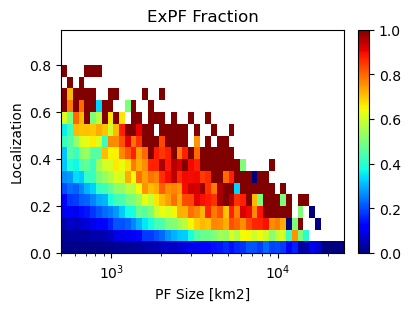

In [51]:
fig, ax = plt.subplots(figsize=(4,3), constrained_layout=True)
cmap = plt.cm.jet
norm = colors.Normalize(vmin=0, vmax=1)
c = ax.pcolormesh(XX, YY, extreme_frac, cmap=cmap, norm=norm)
fig.colorbar(c)
ax.set_xscale('log')
ax.set_title('ExPF Fraction')
ax.set_xlabel('PF Size [km2]')
ax.set_ylabel('Localization')